## **Model Testing**

In [15]:
from tensorflow.keras.models import load_model
# from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import plot_model


In [3]:
import pickle 

with open("../data/Character_Data_Landmarks/A/0/0", 'rb') as f:
    temp = pickle.load(f)

print(temp)

[landmark {
  x: 0.703121542930603
  y: 0.7075721621513367
  z: -1.4293437743617687e-05
}
landmark {
  x: 0.6407036185264587
  y: 0.6598061323165894
  z: -0.00026755392900668085
}
landmark {
  x: 0.6133453249931335
  y: 0.5866129398345947
  z: -0.0033629087265580893
}
landmark {
  x: 0.6085043549537659
  y: 0.517384946346283
  z: -0.01776842586696148
}
landmark {
  x: 0.6079214811325073
  y: 0.45565229654312134
  z: -0.030422991141676903
}
landmark {
  x: 0.6418766379356384
  y: 0.5336267948150635
  z: 0.05150540918111801
}
landmark {
  x: 0.6357977986335754
  y: 0.4693397581577301
  z: 0.01953570358455181
}
landmark {
  x: 0.6321566700935364
  y: 0.5193647742271423
  z: 0.004923675674945116
}
landmark {
  x: 0.6371386647224426
  y: 0.5522836446762085
  z: 0.010959232226014137
}
landmark {
  x: 0.6727499961853027
  y: 0.531866729259491
  z: 0.03800182789564133
}
landmark {
  x: 0.6635476350784302
  y: 0.4697135388851166
  z: -0.010434870608150959
}
landmark {
  x: 0.6554995775222778
  

In [2]:
model = load_model('mp_hand_gesture')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 42)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                2752      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_13 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [16]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


---

## **Media Pipe Testing**

In [8]:
import mediapipe as mp
import cv2
import numpy as np

In [9]:
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=2, min_detection_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

In [4]:
cap = cv2.VideoCapture(0)

while True:
    # Read each frame from the webcam
    _, frame = cap.read()

    x, y, c = frame.shape

    # Flip the frame vertically
    frame = cv2.flip(frame, 1)
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = hands.process(framergb)  
    className = 'Test'

    # post process the result
    if result.multi_hand_landmarks:
        landmarks = []
        # print("result.multi_hand_landmarks: ", len(result.multi_hand_landmarks))
        # for handslms in result.multi_hand_landmarks:
        #     for lm in handslms.landmark:
        #         # print(lm)
        #         lmx = int(lm.x * x)
        #         lmy = int(lm.y * y)

        #         landmarks.append([lmx,lmy])

        for hand_landmarks in result.multi_hand_landmarks:
            print('hand_landmarks:', hand_landmarks)
            print(
                f'Index finger tip coordinates: (',
                f'{hand_landmarks.landmark[mpHands.HandLandmark.INDEX_FINGER_TIP].x * x}, '
                f'{hand_landmarks.landmark[mpHands.HandLandmark.INDEX_FINGER_TIP].y * y})'
            )

            # Drawing landmarks on frames
            mpDraw.draw_landmarks(frame, hand_landmarks, mpHands.HAND_CONNECTIONS)

        # print(np.array(landmarks).shape)
    # show the prediction on the frame
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()

cv2.destroyAllWindows()

hand_landmarks: landmark {
  x: 0.894984245300293
  y: 0.8714275360107422
  z: -3.499493686831556e-05
}
landmark {
  x: 0.8099107146263123
  y: 0.8106160163879395
  z: -0.00827902089804411
}
landmark {
  x: 0.75990891456604
  y: 0.7220265865325928
  z: 0.0043723080307245255
}
landmark {
  x: 0.7379598617553711
  y: 0.6607387661933899
  z: 0.024504315108060837
}
landmark {
  x: 0.7365845441818237
  y: 0.6000010371208191
  z: 0.046837884932756424
}
landmark {
  x: 0.834940493106842
  y: 0.585161030292511
  z: 0.02074892446398735
}
landmark {
  x: 0.8348036408424377
  y: 0.46849697828292847
  z: 0.024248013272881508
}
landmark {
  x: 0.8323816061019897
  y: 0.4097614884376526
  z: 0.0218348428606987
}
landmark {
  x: 0.8339424133300781
  y: 0.3808828592300415
  z: 0.013440934009850025
}
landmark {
  x: 0.8882453441619873
  y: 0.5885422229766846
  z: 0.03390122577548027
}
landmark {
  x: 0.9133652448654175
  y: 0.5031933784484863
  z: 0.05280780419707298
}
landmark {
  x: 0.910980403423309

In [11]:
cap.release()

cv2.destroyAllWindows()

### **Testing Holistic**

In [24]:
mp_holistic = mp.solutions.holistic # Holistic model
holistic = mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils

In [ ]:
cap = cv2.VideoCapture(0)
handsType = []
while True:
    # Read each frame from the webcam
    _, frame = cap.read()

    x, y, c = frame.shape
    # print("Frame Shape: ", x, y, c)

    # Flip the frame vertically
    frame = cv2.flip(frame, 1)
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = hands.process(framergb)  
    className = 'Test'

    
    # post process the result
    if result.multi_hand_landmarks:
        landmarks = []

        if(len(result.multi_hand_landmarks)==1):
            print("Hand Type: ", result.multi_handedness.classification[0].label)
        else:
            print("2 Hand Type: ", result.multi_handedness.classification[0].label)

        print("//////////////////////////////////////////////////////// \n\n")
        print("Test: ", result.multi_hand_landmarks, len(result.multi_hand_landmarks))
        print("//////////////////////////////////////////////////////// \n")

        # for hand in result.multi_handedness:
        #     handType=hand.classification[0].label
        #     print(handType)
        #     handsType.append(handType)

        # print("Type List: ", handsType)

        for handslms in result.multi_hand_landmarks:
            for lm in handslms.landmark:
                # print(id, lm)
                lmx = int(lm.x * x)
                lmy = int(lm.y * y)

                landmarks.append([lmx, 0, lmy, 0])

            # Drawing landmarks on frames
            mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)
                

        # print(np.array(landmarks).shape, landmarks)
    # show the prediction on the frame
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()

cv2.destroyAllWindows()

In [22]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    # Read each frame from the webcam
    _, frame = cap.read()

    x, y, c = frame.shape
    # print("Frame Shape: ", x, y, c)

    # Flip the frame vertically
    frame = cv2.flip(frame, 1)
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = holistic.process(framergb)  
    className = 'Test'

    # post process the result
    if result.left_hand_landmarks or result.right_hand_landmarks:
        landmarks = []

        lh = [[res.x, res.y] for res in result.left_hand_landmarks.landmark] if result.left_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
        rh = [[res.x, res.y] for res in result.right_hand_landmarks.landmark] if result.right_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
        
        print("Initial: ", np.array(lh).shape, np.array(rh).shape)
        for i in range(len(lh)):
            landmarks.append(np.append(lh[i], rh[i]).tolist())
        
        # Drawing landmarks on frames

        mpDraw.draw_landmarks(frame, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
        mpDraw.draw_landmarks(frame, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

        print(np.array(landmarks).shape)
        # print(landmarks)

    # show the prediction on the frame
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()

cv2.destroyAllWindows()

In [29]:
cap = cv2.VideoCapture(0)

while True:
    # Read each frame from the webcam
    _, frame = cap.read()

    x, y, c = frame.shape
    # print("Frame Shape: ", x, y, c)

    # Flip the frame vertically
    frame = cv2.flip(frame, 1)
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = holistic.process(framergb)  
    className = 'Test'

    
    # post process the result
    if result.left_hand_landmarks or result.right_hand_landmarks:
        landmarks = []

        if result.left_hand_landmarks:
            landmarks = [[res.x, res.y] for res in result.left_hand_landmarks.landmark]
            print("Left hand")
        elif result.right_hand_landmarks:
            landmarks = [[res.x, res.y] for res in result.right_hand_landmarks.landmark]
            print("Right hand")

        
        # Drawing landmarks on frames
        mpDraw.draw_landmarks(frame, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
        mpDraw.draw_landmarks(frame, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

        print(np.array(landmarks).shape)
        # print(landmarks)

    # show the prediction on the frame
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()

cv2.destroyAllWindows()

Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Right hand
(21, 2)
Right hand
(21, 2)
Right hand
(21, 2)
Right hand
(21, 2)
Right hand
(21, 2)
Right hand
(21, 2)
Right hand
(21, 2)
Right hand
(21, 2)
Right hand
(21, 2)
Right hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)
Left hand
(21, 2)


In [26]:
cap.release()
cv2.destroyAllWindows()

In [56]:
tmp = np.zeros(21*2).reshape(-1,2).tolist()
tmp_1 = np.ones(21*2).reshape(-1,2).tolist()

print("Tmp:\n", tmp )
print("Tmp_1:\n", tmp_1 )

Tmp:
 [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
Tmp_1:
 [[1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]


In [57]:
for i in range(len(tmp)):
    tmp[i] = np.append(tmp[i], tmp_1[i]).tolist()
    # tmp[i] = tmp[i]

print(tmp)

[[0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0]]


---

## **Data Collection Gestures**

In [5]:
import os
import mediapipe as mp 
import numpy as np
import cv2

In [6]:
# mp_holistic = mp.solutions.holistic # Holistic model
# mp_drawing = mp.solutions.drawing_utils # Drawing utilities

mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=2, min_detection_confidence=0.7)

mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

In [7]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data_Test') 

# Actions that we try to detect
actions = np.array(['Hello', 'Love You', 'Understand', 'Thanks', 'Some', 'Home', 'name', 'my', 'how'])
# actions = np.array(['name'])

# Thirty videos worth of data
no_sequences =  25

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [8]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [13]:
import numpy as np

a = [1,2,3]
b = [4,5,6]

print(np.array([a,b]).flatten())

[1 2 3 4 5 6]


In [14]:
cap = cv2.VideoCapture(0)
    
# NEW LOOP
# Loop through actions
for action in actions:
    # Loop through sequences aka videos
    for sequence in range(start_folder, start_folder+no_sequences):
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):

            _, frame = cap.read()

            x, y, c = frame.shape

            # Flip the frame vertically
            frame = cv2.flip(frame, 1)
            framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Get hand landmark prediction
            result = holistic.process(framergb)  
            className = ''
            
            # post process the result
            if result.left_hand_landmarks or result.right_hand_landmarks:
                landmarks = []

                lh = [[res.x, res.y] for res in result.left_hand_landmarks.landmark] if result.left_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
                rh = [[res.x, res.y] for res in result.right_hand_landmarks.landmark] if result.right_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
                
                print("Initial: ", np.array(lh).shape, np.array(rh).shape)
                for i in range(len(lh)):
                    landmarks.append(np.append(lh[i], rh[i]).tolist())
                
                # landmarks.append(np.array([lh,rh]).flatten())
                

                # Drawing landmarks on frames
                mpDraw.draw_landmarks(frame, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
                mpDraw.draw_landmarks(frame, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(frame, 'STARTING COLLECTION', (120,200), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,15), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                    cv2.waitKey(600)
                else: 
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,12), 
                            -cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                
                
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                # npy_path = "./MP_Data/" + action + "_" + str(sequence) + "_" + str(frame_num)
                np.save(npy_path, landmarks)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                
cap.release()
cv2.destroyAllWindows()

In [10]:
cap.release()
cv2.destroyAllWindows()

In [41]:
# import necessary packages

import cv2
import numpy as np
import pickle
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import load_model

# initialize mediapipe
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

# Load the gesture recognizer model
model = load_model('checkpoints\\two_hand_9_model')

with open('gestures.pkl', 'rb') as f:
    classNames = pickle.load(f)

print(classNames)


sentence = []
predictions = []

# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    # Read each frame from the webcam
    _, frame = cap.read()

    x, y, c = frame.shape

    # Flip the frame vertically
    frame = cv2.flip(frame, 1)
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # framergb = increase_brightness(framergb, value=2)

    # Get hand landmark prediction
    result = holistic.process(framergb)     
    className = ''

    # post process the result
    if result.left_hand_landmarks or result.right_hand_landmarks:
        landmarks = []

        lh = [[res.x, res.y] for res in result.left_hand_landmarks.landmark] if result.left_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
        rh = [[res.x, res.y] for res in result.right_hand_landmarks.landmark] if result.right_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
        
        for i in range(len(lh)):
            # landmarks.append(np.append(lh[i], rh[i]).tolist())
            landmarks.append([lh[i][0], lh[i][1], rh[i][0], rh[i][1]])
        
        # Drawing landmarks on frames
        mpDraw.draw_landmarks(frame, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
        mpDraw.draw_landmarks(frame, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


        # Predict gesture
        prediction = model.predict([landmarks])
        # print("Prediction: ", prediction)
        predictions.append(np.argmax(prediction))
        # print("Predictions: ", predictions)
        classID = np.argmax(prediction)
        # print("Class ID: ", classID)
        className = classNames[classID]
        # print("Unique: ", np.unique(predictions[-30:]))
        
        # if np.unique(predictions[-30:])[0]==np.argmax(prediction) and len(predictions)>30:
        #     # print("Logic active")
        #     sentence.append(className)
        #     print("Sentence: ", sentence)

        if cv2.waitKey(1) == ord('e'):
            sentence.append(className)
            print("Added: ", sentence)

        if cv2.waitKey(1) == ord('r'):
            sentence.pop()
            print("Popped: ", sentence)

    # show the prediction on the frame
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)
    
    if len(sentence) > 5: 
                sentence = sentence[-5:]

    cv2.rectangle(frame, (0,0), (640, 40), (245, 117, 16), -1)
    cv2.putText(frame, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()

cv2.destroyAllWindows()

['Hello' 'Love You' 'Understand' 'Thanks' 'Some' 'Home' 'name' 'my' 'how']
Added:  ['Hello']
Added:  ['Hello', 'my']


In [20]:
cap.release()
cv2.destroyAllWindows()

---

## **Data Colelction Alphabets**

In [16]:
import os
import mediapipe as mp 
import numpy as np
import cv2

In [17]:
# mpHands = mp.solutions.hands
# hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)

mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

In [18]:
DATA_PATH = os.path.join('MP_Data_Char') 

actions = np.array( [ chr(i) for i in range(ord('A'), ord('F')+1) ] )
print(actions)

no_sequences =  25
sequence_length = 30
start_folder = 0

['A' 'B' 'C' 'D' 'E' 'F']


In [ ]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [19]:
cap = cv2.VideoCapture(0)
    
# NEW LOOP
# Loop through actions
for action in actions:
    # Loop through sequences aka videos
    for sequence in range(start_folder, start_folder+no_sequences):
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):

            _, frame = cap.read()

            x, y, c = frame.shape

            # Flip the frame vertically
            frame = cv2.flip(frame, 1)
            framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Get hand landmark prediction
            result = hands.process(framergb)  
            className = ''
            
            if result.left_hand_landmarks :
                landmarks = []

                lh = [[res.x, res.y] for res in result.left_hand_landmarks.landmark]
                landmarks.append(lh)
                mpDraw.draw_landmarks(frame, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

            elif result.right_hand_landmarks :
                landmarks = []

                rh = [[res.x, res.y] for res in result.right_hand_landmarks.landmark]
                landmarks.append(rh)
                mpDraw.draw_landmarks(frame, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

            # post process the result
            if result.multi_hand_landmarks:
                landmarks = []
                for handslms in result.multi_hand_landmarks:
                    for lm in handslms.landmark:
                        # print(id, lm)
                        lmx = int(lm.x * x)
                        lmy = int(lm.y * y)

                        landmarks.append([lmx, lmy])

                    # Drawing landmarks on frames
                    mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)


                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(frame, 'STARTING COLLECTION', (120,200), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,15), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,12), 
                            -cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                
                
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                # npy_path = "./MP_Data/" + action + "_" + str(sequence) + "_" + str(frame_num)
                np.save(npy_path, landmarks)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

---

## **Data Formating**

In [15]:
import os
import pandas as pd
os.getcwd()

'd:\\VIT\\SEM-8\\Main Code'

In [16]:
tmp = np.load("./MP_Data_Test/Hello/1/0.npy")
print(tmp.shape)
ee = tmp.flatten()
print(ee.shape)

(1, 84)
(84,)


In [17]:
list_of_files = {}
for (dirpath, dirnames, filenames) in os.walk("MP_Data"):
    # print(dirpath, "\n", dirnames, "\n", len(filenames))
    if(len(filenames)!=30):
         print(dirpath, "\n", len(filenames))

MP_Data 
 0
MP_Data\Hello 
 0
MP_Data\Hello\0 
 29
MP_Data\Home 
 0
MP_Data\Home\0 
 1
MP_Data\Home\12 
 23
MP_Data\Home\13 
 29
MP_Data\Home\14 
 29
MP_Data\Home\16 
 18
MP_Data\Home\17 
 29
MP_Data\Home\19 
 28
MP_Data\Home\4 
 28
MP_Data\how 
 0
MP_Data\Love You 
 0
MP_Data\my 
 0
MP_Data\name 
 0
MP_Data\Some 
 0
MP_Data\Some\2 
 28
MP_Data\Thanks 
 0
MP_Data\Understand 
 0
MP_Data\Understand\10 
 22


In [18]:
# actions = np.array(['Hello', 'Love', 'Understand', 'Thanks'])
label_map = {label:num for num, label in enumerate(actions)}
print(label_map)

{'Hello': 0, 'Love You': 1, 'Understand': 2, 'Thanks': 3, 'Some': 4, 'Home': 5, 'name': 6, 'my': 7, 'how': 8}


In [20]:
data = []
labels = []

for action in actions:
    for (dirpath, dirnames, filenames) in os.walk(os.path.join("MP_Data_Test", action)):
        if(len(dirnames)==0):
            for filename in filenames:
                data.append(np.load( os.path.join(dirpath, filename) ))
                labels.append(label_map[action])

data = np.array(data)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(6471, 1, 84)
(6471,)


In [21]:
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

{0: 750, 1: 750, 2: 750, 3: 750, 4: 749, 5: 749, 6: 748, 7: 750, 8: 475}


In [22]:
# from tensorflow.keras.utils.np_utils import to_categorical
import tensorflow as tf

lab = tf.keras.utils.to_categorical(labels)
print(lab.shape)

(6471, 9)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, lab, test_size=0.2, random_state=42)

unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
print(dict(zip(unique, counts)))

unique, counts = np.unique(np.argmax(y_test, axis=1), return_counts=True)
print(dict(zip(unique, counts)))

{0: 577, 1: 600, 2: 611, 3: 607, 4: 593, 5: 597, 6: 601, 7: 610, 8: 380}
{0: 173, 1: 150, 2: 139, 3: 143, 4: 156, 5: 152, 6: 147, 7: 140, 8: 95}


In [24]:
print("Training: ", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Training:  (5176, 1, 84) (5176, 9)
Test:  (1295, 1, 84) (1295, 9)


---

## **Model Training**

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [30]:
model = Sequential([
    # Flatten(input_shape=(21, X_train.shape[2])),
    Flatten(input_shape=(1,84)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(512, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 84)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                5440      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 9)                

In [31]:
callback_checkpoint = ModelCheckpoint(
    './checkpoints/', monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=True, mode='auto', save_freq='epoch',
)
callback_loss = EarlyStopping(monitor='loss', patience=3)

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    callbacks=[callback_checkpoint, callback_loss])

Epoch 1/50
162/162 [==============================] - 1s 2ms/step - loss: 1.2988 - accuracy: 0.5259
Epoch 2/50
162/162 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.7813
Epoch 3/50
162/162 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.8518
Epoch 4/50
162/162 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.9165
Epoch 5/50
162/162 [==============================] - 0s 2ms/step - loss: 0.2758 - accuracy: 0.9185
Epoch 6/50
162/162 [==============================] - 0s 2ms/step - loss: 0.2251 - accuracy: 0.9349
Epoch 7/50
162/162 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9417
Epoch 8/50
162/162 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.9531
Epoch 9/50
162/162 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.9473
Epoch 10/50
162/162 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9544

In [34]:
model.save("./checkpoints/two_hand_alternate features")

INFO:tensorflow:Assets written to: ./checkpoints/two_hand_alternate features\assets


---

## **Metrics**

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
y_pred = model.predict(X_test)
y_preds = np.argmax(y_pred, axis=1)
print(y_preds[:10])

[2 5 8 0 7 4 2 1 3 3]


In [37]:
unique, counts = np.unique(y_preds, return_counts=True)
print(dict(zip(unique, counts)))

{0: 173, 1: 147, 2: 141, 3: 168, 4: 128, 5: 154, 6: 149, 7: 149, 8: 86}


In [38]:
def evaluate_model(history,X_test,y_test,model):
  """
    Input: 
      history - Model history variable
      X_test - Test features
      y_test - Target test variables
      model - Keras Model 

    Output:
      Accuracy Plot (Training + Validation)
      Loss Plot (Training + Validation)
      Confusion matrix
      Accuracy
      Classification Report 
  """  
  scores = model.evaluate((X_test),y_test, verbose=0)
  
  fig, axs = plt.subplots(1,3, figsize=(18,5))
  fig.tight_layout()

  axs[0].plot(history.history['accuracy'])
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_title('Model - Accuracy')
  axs[0].legend(['Training'], loc='lower right')

  axs[1].plot(history.history['loss'])
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Model Loss')
  axs[1].set_title('Model - Loss')
  axs[1].legend(['Training'], loc='upper right')

  target_names=actions
  
  y_true=[]
  for element in y_test:
      y_true.append(np.argmax(element))
  prediction_proba = model.predict(X_test)
  prediction = np.argmax(prediction_proba,axis=1)
  cnf_matrix = confusion_matrix(y_true, prediction)    
  g = sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', ax=axs[2],
                  xticklabels=target_names, yticklabels=target_names)
  plt.show()

  print("\nAccuracy: %.2f%% \n" % (scores[1]*100))
  print(classification_report(y_true, prediction, target_names=target_names))
    

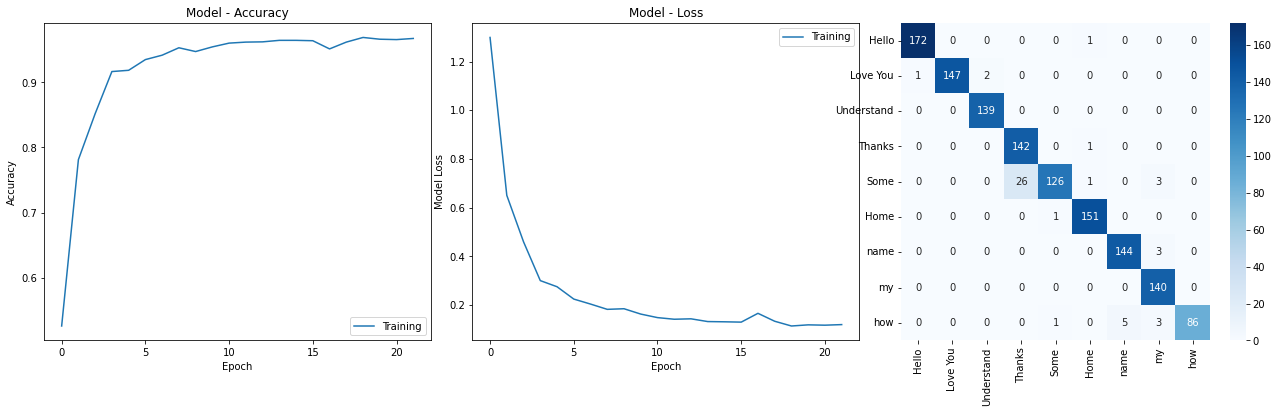


Accuracy: 96.29% 

              precision    recall  f1-score   support

       Hello       0.99      0.99      0.99       173
    Love You       1.00      0.98      0.99       150
  Understand       0.99      1.00      0.99       139
      Thanks       0.85      0.99      0.91       143
        Some       0.98      0.81      0.89       156
        Home       0.98      0.99      0.99       152
        name       0.97      0.98      0.97       147
          my       0.94      1.00      0.97       140
         how       1.00      0.91      0.95        95

    accuracy                           0.96      1295
   macro avg       0.97      0.96      0.96      1295
weighted avg       0.97      0.96      0.96      1295



In [39]:
evaluate_model(history, X_test, y_test, model)

---

## **Testing Video**

In [69]:
colors = [(245,117,16), (117,245,16), (16,117,245)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[1], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [90]:
import pickle

with open('gestures.pkl','rb') as f:
    actions = pickle.load(f)

print(actions)

['Hello' 'Love You' 'Understand' 'Thanks' 'Some' 'Home' 'name' 'my' 'how']


In [91]:
# import necessary packages
import cv2
import numpy as np
import pickle
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import load_model

# initialize mediapipe
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

# Load the gesture recognizer model
model = load_model('checkpoints\\two_hand_9_model')

# Load class names
with open('gestures.pkl','rb') as f:
    actions = pickle.load(f)
classNames = actions
print(classNames)

sentence = []
predictions = []

def mediapipe_detection(image, model):
    image = cv2.flip(image, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    results = model.process(image)                 # Make prediction
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    # Read each frame from the webcam
    _, frame = cap.read()
    x, y, c = frame.shape
    frame, result = mediapipe_detection(frame, holistic)
    className = ''

    # post process the result
    if result.left_hand_landmarks or result.right_hand_landmarks:
        landmarks = []

        lh = [[res.x, res.y] for res in result.left_hand_landmarks.landmark] if result.left_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
        rh = [[res.x, res.y] for res in result.right_hand_landmarks.landmark] if result.right_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
        
        for i in range(len(lh)):
            # landmarks.append(np.append(lh[i], rh[i]).tolist())
            landmarks.append([lh[i][0], lh[i][1], rh[i][0], rh[i][1]])
        
        # Drawing landmarks on frames
        mpDraw.draw_landmarks(frame, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
        mpDraw.draw_landmarks(frame, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


        # Predict gesture
        prediction = model.predict([landmarks])
        # print("Prediction: ", prediction[0])
        classID = np.argmax(prediction)
        # print("Class ID: ", classID)
        predictions.append(classID)
        className = classNames[classID]

        if np.unique(predictions[-20:])[0] == classID: 
                if prediction[0][classID] > 0.7: 
                    
                    if len(sentence) > 0: 
                        if actions[classID] != sentence[-1]:
                            sentence.append(actions[classID])
                    else:
                        sentence.append(actions[classID])

        if len(sentence) > 5: 
            sentence = sentence[-5:]
        

        frame = prob_viz(prediction[0], actions, frame, colors)

    if cv2.waitKey(1) == ord('r'):
            sentence.pop()
            print("Popped: ", sentence)
            
    # show the prediction on the frame
    cv2.rectangle(frame, (0,0), (640, 40), (255, 140, 51), -1)
    cv2.putText(frame, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()

cv2.destroyAllWindows()

['Hello' 'Love You' 'Understand' 'Thanks' 'Some' 'Home' 'name' 'my' 'how']
Popped:  ['Hello', 'my', 'name', 'Some']
Popped:  ['Hello', 'my', 'name']


In [79]:
cap.release()
cv2.destroyAllWindows()

---

<br>

## **JavaScript Testing**

In [37]:
arr = [
    [
        [
            231.25245666503906,
            436.85791015625
        ],
        [
            252.17628479003906,
            422.4544982910156
        ],
        [
            267.0010986328125,
            385.93304443359375
        ],
        [
            267.45245361328125,
            354.3481750488281
        ],
        [
            258.3341369628906,
            338.7341003417969
        ],
        [
            256.4569396972656,
            297.6343688964844
        ],
        [
            255.69883728027344,
            240.15328979492188
        ],
        [
            254.937255859375,
            204.6046142578125
        ],
        [
            254.3539276123047,
            173.53533935546875
        ],
        [
            244.80857849121094,
            294.9783935546875
        ],
        [
            243.76751708984375,
            228.81069946289062
        ],
        [
            242.63462829589844,
            184.99740600585938
        ],
        [
            241.18145751953125,
            148.3877410888672
        ],
        [
            233.75621032714844,
            304.5640869140625
        ],
        [
            231.8082733154297,
            240.73304748535156
        ],
        [
            230.0575408935547,
            200.4009246826172
        ],
        [
            227.9897003173828,
            165.63626098632812
        ],
        [
            222.39340209960938,
            324.98492431640625
        ],
        [
            221.29708862304688,
            277.03778076171875
        ],
        [
            220.88597106933594,
            245.70700073242188
        ],
        [
            220.2891845703125,
            216.38546752929688
        ]
    ]
]

In [38]:
import numpy as np

input_array = np.array(arr) 
print(input_array.shape)

(1, 21, 2)


In [2]:
from tensorflow.keras.models import load_model

# model_xy = load_model("../model_saves/only_coordinates")
model = load_model("../model_saves/checkpoints/two_hand_9_model")

In [4]:
import os
print(os.getcwd())

d:\VIT\SEM-8\Main Code\ML\playground


In [5]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, "../../public/models/gestures")

In [40]:
output = model_xy.predict(input_array)
print(output)

[[2.3049160e-13 9.9937302e-01 6.9378402e-05 1.3918666e-06 3.7647243e-07
  4.9542967e-04 4.6864415e-09 2.1171841e-06 1.6482433e-12 1.7749132e-08
  1.2454997e-10 1.4587943e-10 2.0651549e-14 3.9407179e-15 3.4212098e-11
  4.9424452e-16 1.0734880e-16 7.9010340e-12 2.8300218e-17 1.7047334e-09
  2.9332470e-10 5.8315145e-05 9.7281785e-15 4.0282956e-15]]


In [41]:
print(np.argmax(output))
print(output[0][np.argmax(output)])

1
0.999373


In [10]:
import pickle

with open('../data/dimensions.pkl', 'rb') as f:
    print(pickle.load(f))

[480, 640, 3]


In [12]:
import pickle

path = '../data/Character_Data_Landmarks/B/3/8'

with open(path, 'rb') as f:
    list_landmarks = pickle.load(f)

In [33]:
sample_point = []

for lm in list_landmarks:
    for point in lm.landmark:
        sample_point.append([point.x, point.y])

print(sample_point)
print(np.array(sample_point).shape)

[[0.14853642880916595, 0.5777831673622131], [0.20090588927268982, 0.5479373931884766], [0.23008473217487335, 0.49122101068496704], [0.22029472887516022, 0.43146100640296936], [0.20148897171020508, 0.38043662905693054], [0.22239089012145996, 0.3874575197696686], [0.22643858194351196, 0.30980822443962097], [0.22556072473526, 0.2609073519706726], [0.22255417704582214, 0.21780945360660553], [0.18752843141555786, 0.3791562616825104], [0.19451060891151428, 0.29172495007514954], [0.19480226933956146, 0.23470458388328552], [0.1937789022922516, 0.18587258458137512], [0.1565273106098175, 0.3842151165008545], [0.16322888433933258, 0.3087053596973419], [0.16871072351932526, 0.25868016481399536], [0.17183917760849, 0.2184738963842392], [0.1246536523103714, 0.3999864161014557], [0.12740083038806915, 0.3413073718547821], [0.13170836865901947, 0.30426397919654846], [0.13564306497573853, 0.2708900272846222]]
(21, 2)


In [34]:
alphabetLabels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'U', 'V', 'W', 'X', 'Y']
DATA_PATH = "../data/Character_Data_Landmarks"
no_sequences =  25
sequence_length = 30

label_map = {label:num for num, label in enumerate(alphabetLabels)}
print(label_map)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'U': 19, 'V': 20, 'W': 21, 'X': 22, 'Y': 23}


In [35]:
data = []
labels = []
missing = []

with open('../data/dimensions.pkl', 'rb') as f:
    x, y, c = pickle.load(f)

for action in alphabetLabels:
    # Loop through sequences aka videos
    for sequence in range(0, 0 + no_sequences): 
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):

            pkl_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))

            try:
                with open(pkl_path, 'rb') as f:
                    result = pickle.load(f)

                landmarks = []
                for handslms in result:
                    for lm in handslms.landmark:
                        lmx = int(lm.x * x)
                        lmy = int(lm.y * y)
                        
                        landmarks.append([lmx, lmy])
                
                data.append(landmarks)
                labels.append(label_map[action])
                
            except:
                missing.append(pkl_path)

            
data = np.array(data)
labels = np.array(labels)

In [36]:
print(data)

[[[337 452]
  [307 422]
  [294 375]
  ...
  [349 325]
  [344 355]
  [346 369]]

 [[338 452]
  [307 421]
  [295 375]
  ...
  [347 324]
  [340 353]
  [343 369]]

 [[334 450]
  [304 422]
  [290 375]
  ...
  [344 325]
  [338 354]
  [340 367]]

 ...

 [[128 601]
  [150 574]
  [166 526]
  ...
  [ 87 467]
  [ 77 444]
  [ 67 421]]

 [[127 600]
  [150 573]
  [167 526]
  ...
  [ 87 466]
  [ 76 444]
  [ 67 421]]

 [[127 601]
  [150 573]
  [167 525]
  ...
  [ 87 467]
  [ 77 444]
  [ 68 421]]]


In [6]:
import numpy as np

print(np.zeros(21*2).reshape(-1,2).tolist())

[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
